We are only working with $l=m=3$ mode in the calculations below. The field and its derivative have been calculated on the horizon.

The **_hi** in the cells below stands for higher resolution data. General tip would be to include some text/intructions (1 or 2 lines) in every cell about what is being calculated.

# Gaussian with center 1.1

## Loading and extracting data

In [1]:
addpath('phd_work/projects/non_axisymmetric_hair/data_l3m3/loc11/TimeDAT')

infield_data = load('Psi0_0.dat');
der_infield_data = load('Psi0_1.dat');
der2_infield_data = load('Psi0_2.dat');
outfield_data = load('Psi4_0.dat');
der_outfield_data = load('Psi4_1.dat');
der2_outfield_data = load('Psi4_2.dat');

infield_data_hi = load('Psi0_0hi.dat');
der_infield_data_hi = load('Psi0_1hi.dat');
der2_infield_data_hi = load('Psi0_2hi.dat');

time_infield = infield_data(:,1);
real_infield = infield_data(:,2); % extracting 2nd and 3rd columns for l=3
imag_infield = infield_data(:,3);
real_der_infield = der_infield_data(:,2);
imag_der_infield = der_infield_data(:,3);
real_der2_infield = der2_infield_data(:,2);
imag_der2_infield = der2_infield_data(:,3);

time_infield_hi = infield_data_hi(:,1);
real_infield_hi = infield_data_hi(:,2);
imag_infield_hi = infield_data_hi(:,3);
real_der_infield_hi = der_infield_data_hi(:,2);
imag_der_infield_hi = der_infield_data_hi(:,3);
real_der2_infield_hi = der2_infield_data_hi(:,2);
imag_der2_infield_hi = der2_infield_data_hi(:,3);

time_outfield = outfield_data(:,1);
real_outfield = outfield_data(:,2);
imag_outfield = outfield_data(:,3);
real_der_outfield = der_outfield_data(:,2);
imag_der_outfield = der_outfield_data(:,3);
real_der2_outfield = der2_outfield_data(:,2);
imag_der2_outfield = der2_outfield_data(:,3);

rmpath('phd_work/projects/non_axisymmetric_hair/data_l3m3/loc11/TimeDAT')

In [2]:
%test to verify that data is loaded correctly
%plot(time_infield,real_infield)
%length(real_outfield)

time_infield(1:50)
time_infield_hi(1:50)

ans = 50x1 double
         0
    0.0689
    0.1377
    0.2066
    0.2754
    0.3443
    0.4131
    0.4820
    0.5508
    0.6197
...

ans = 50x1 double
         0
    0.0344
    0.0689
    0.1033
    0.1377
    0.1721
    0.2066
    0.2410
    0.2754
    0.3098
...

## Defining fields and their derivatives

In [3]:
Psi0 = real_infield + 1i.*imag_infield;
Psi4 = real_outfield + 1i.*imag_outfield;

Psi0_hi = real_infield_hi + 1i.*imag_infield_hi;

der_Psi0 = real_der_infield + 1i.*imag_der_infield;
der_Psi4 = real_der_outfield + 1i.*imag_der_outfield;

der_Psi0_hi = real_der_infield_hi + 1i.*imag_der_infield_hi;

der2_Psi0 = real_der2_infield + 1i.*imag_der2_infield;
der2_Psi4 = real_der2_outfield + 1i.*imag_der2_outfield;

der2_Psi0_hi = real_der2_infield_hi + 1i.*imag_der2_infield_hi;

bbscalar_11 = Psi0.*Psi4;
bbscalar_11_hi = Psi0_hi(1:2:end).*Psi4;
hair = abs(Psi0.*der_Psi4 + Psi4.*der_Psi0);

hair_hi = abs(Psi0_hi(1:2:end).*der_Psi4 + Psi4.*der_Psi0_hi(1:2:end));
%tder_hair_11 = (hair_11(2:end) - hair_11(1:end-1))./(time_infield(2:end) - time_infield(1:end-1));

In [ ]:
length(Psi0_hi)
length(Psi0_hi(1:2:end))
length(Psi4)

## Finding the LPI of the fields and their derivatives

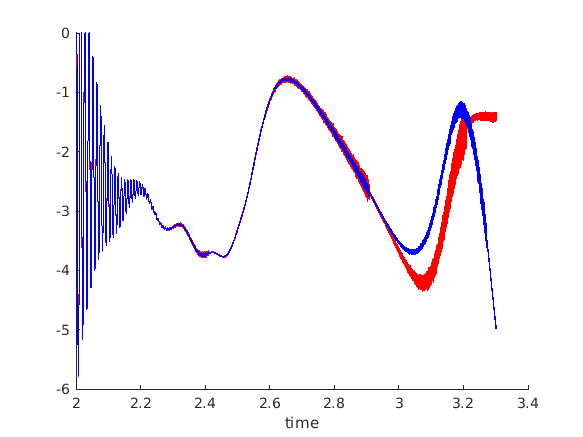

In [4]:
LPI_Psi0 = (log10(abs(Psi0(2:end))) - log10(abs(Psi0(1:end-1))))./(log10(time_infield(2:end)) - log10(time_infield(1:end-1)));
LPI_Psi0_hi = (log10(abs(Psi0_hi(2:end))) - log10(abs(Psi0_hi(1:end-1))))./(log10(time_infield_hi(2:end)) - log10(time_infield_hi(1:end-1)));

hold on
plot(log10(time_infield_hi(2:end)),LPI_Psi0_hi,'-r')
plot(log10(time_infield(2:end)),LPI_Psi0,'-b')
xlim([2,3.4])
ylim([-6,0])
xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
hold off

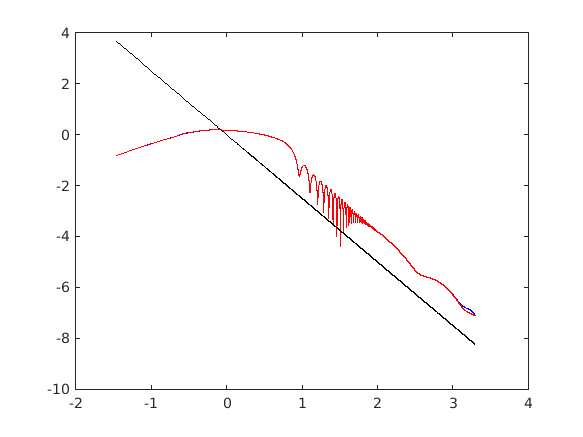

In [5]:
plot(log10(time_infield),log10(abs(Psi0)),'-b')
hold on
plot(log10(time_infield_hi),log10(abs(Psi0_hi)),'-r')
plot(log10(time_infield_hi),-2.5*log10(time_infield_hi),'-k')
hold off

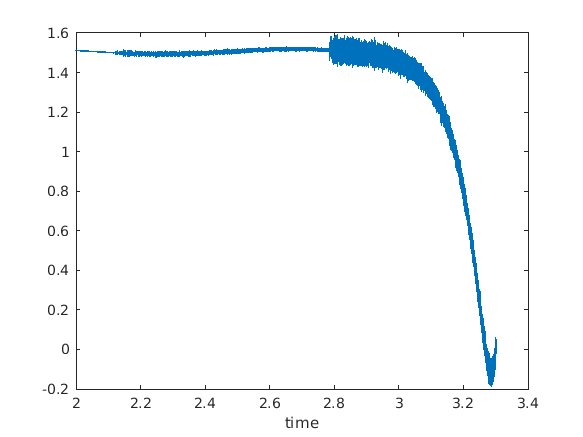

In [6]:
LPI_Psi4 = (log10(abs(Psi4(2:end))) - log10(abs(Psi4(1:end-1))))./(log10(time_infield(2:end)) - log10(time_infield(1:end-1)));
plot(log10(time_outfield(2:end)),LPI_Psi4)
xlim([2,3.4])
xlabel('time')

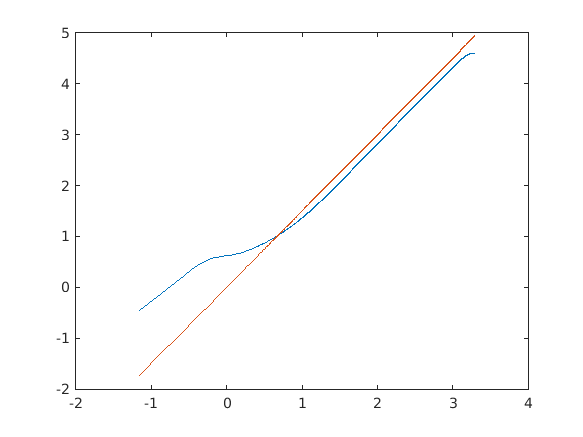

In [7]:
plot(log10(time_outfield),log10(abs(Psi4)))
%xlim([3,3.4])
hold on
plot(log10(time_outfield),1.5*log10(time_outfield))
%xlabel('time')
%ylabel('|\xi_{3,3}''|')
hold off

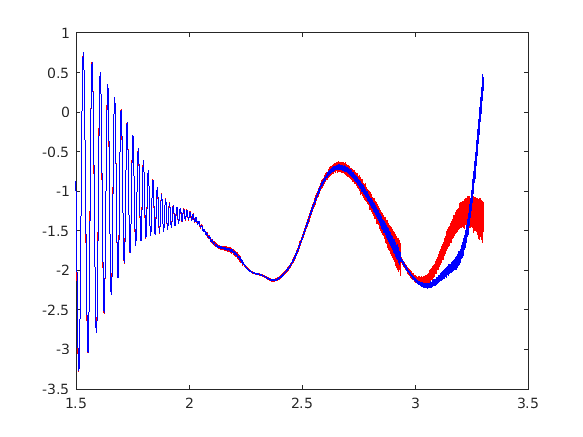

In [8]:
LPI_der_Psi0 = (log10(abs(der_Psi0(2:end))) - log10(abs(der_Psi0(1:end-1))))./(log10(time_infield(2:end)) - log10(time_infield(1:end-1)));
LPI_der_Psi0_hi = (log10(abs(der_Psi0_hi(2:end))) - log10(abs(der_Psi0_hi(1:end-1))))./(log10(time_infield_hi(2:end)) - log10(time_infield_hi(1:end-1)));
plot(log10(time_infield_hi(2:end)),LPI_der_Psi0_hi,'-r')
hold on
plot(log10(time_infield(2:end)),LPI_der_Psi0,'-b')
xlim([1.5,3.5])
hold off

In [ ]:
%hold on
LPI_der_Psi4 = (log10(abs(der_Psi4(2:end))) - log10(abs(der_Psi4(1:end-1))))./(log10(time_infield(2:end)) - log10(time_infield(1:end-1)));
plot(log10(time_outfield(2:end)),LPI_der_Psi4)
xlim([1.5,3.5])
%plot(log10(time_infield),log10(abs(der_Psi0)))
%ylim([30,50])
xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

In [ ]:
%hold on
LPI_der2_Psi0 = (log10(abs(der2_Psi0(2:end))) - log10(abs(der2_Psi0(1:end-1))))./(log10(time_infield(2:end)) - log10(time_infield(1:end-1)));
plot(log10(time_infield(2:end)),LPI_der2_Psi0)
xlim([1.5,3.5])
%plot(log10(time_infield),log10(abs(der_Psi0)))
%ylim([30,50])
%xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off
%plot(log10(time_infield),log10(abs(der_Psi4)))
%ylim([30,50])
xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

In [ ]:
%hold on
%hold on
LPI_der2_Psi4 = (log10(abs(der2_Psi4(2:end))) - log10(abs(der2_Psi4(1:end-1))))./(log10(time_infield(2:end)) - log10(time_infield(1:end-1)));
plot(log10(time_infield(2:end)),LPI_der2_Psi4)
xlim([1.5,3.5])
%plot(log10(time_infield),log10(abs(der_Psi0)))
%ylim([30,50])
xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off
%plot(log10(time_infield),log10(abs(der2_Psi0)))
%xlim([3,3.5])
%xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

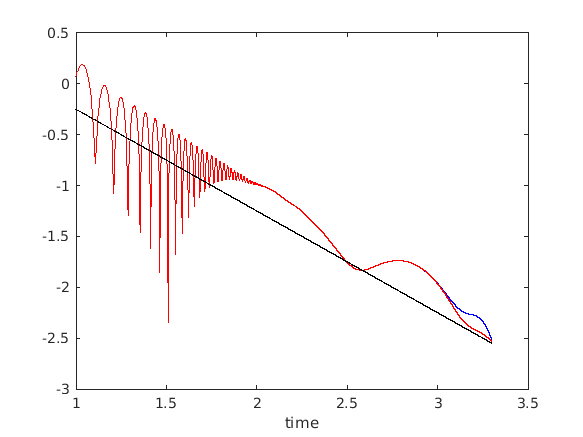

In [11]:
%hold on
plot(log10(time_infield),log10(abs(bbscalar_11)),'-b')
hold on
plot(log10(time_infield),log10(abs(bbscalar_11_hi)),'-r')
plot(log10(time_infield),-1.*log10(time_infield)+0.75,'-k')
hold off
xlim([1.0,3.5])
xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

In [ ]:
plot((time_infield),hair,'-b')
hold on
plot((time_infield),hair_hi,'-r')
%ylim([30,50])
xlabel('log_{10}time')
ylabel('|\xi_{3,3}''|') 
hold off

In [ ]:
%hold on
plot(time_infield,hair_11)
%ylim([30,50])
xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

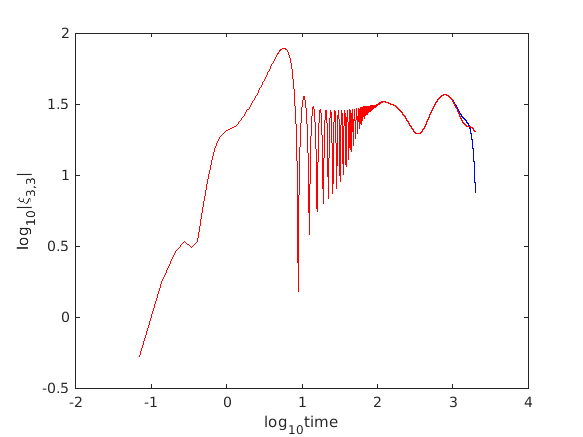

In [9]:
plot(log10(time_infield),log10(hair),'-b')
hold on
plot(log10(time_infield),log10(hair_hi),'-r')
%ylim([30,50])
xlabel('log_{10}time')
ylabel('log_{10}|\xi_{3,3}|')
hold off

In [ ]:
%hold on
plot(time_infield(2:end),der_hair_11)
ylim([-50,90])
xlabel('time')
ylabel('\partial_{t}|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

In [10]:
%hold off
plot(time_infield,abs(bbscalar))
ylim([-5,25])
xlabel('time')
ylabel('|\psi_{0}\psi_{4}|')

Unrecognized function or variable 'bbscalar'.

# Gaussian with center 1.2

The analysis below uses files with names "**Psi0_0Hi**". The Hi means higher resolution. Since the earlier(files named with "hi") batch had higher resolution data compared compared to the 1st batch. This one has even higher resolution compared to the 2nd batch. Hence named "Hi". 

In [1]:
addpath('phd_work/projects/non_axisymmetric_hair/data_l3m3/loc12/TimeDAT')
addpath('phd_work/projects/non_axisymmetric_hair/data_l3m3/high_res/TimeDAT12')
%home/sbishoyi_umassd_edu/phd_work/projects/non_axisymmetric_hair/data_l3m3/high_res/TimeDAT12/Psi0_0Hi.dat

% Psi0 data 
infield_data = load('Psi0_0.dat');
der_infield_data = load('Psi0_1.dat');
der2_infield_data = load('Psi0_2.dat');

% Psi4 data
outfield_data = load('Psi4_0.dat');
der_outfield_data = load('Psi4_1.dat');
der2_outfield_data = load('Psi4_2.dat');

% Psi0 higher resolution data
infield_data_Hi = load('Psi0_0Hi.dat');
der_infield_data_Hi = load('Psi0_1Hi.dat');
der2_infield_data_Hi = load('Psi0_2Hi.dat');

% extracting Psi0 and its derivatives

time_infield = infield_data(1:29047,1);
real_infield = infield_data(1:29047,2);
imag_infield = infield_data(1:29047,3);

real_der_infield = der_infield_data(1:29047,2);
imag_der_infield = der_infield_data(1:29047,3);
real_der2_infield = der2_infield_data(1:29047,2);
imag_der2_infield = der2_infield_data(1:29047,3);

% extracting higher resolution
time_infield_Hi = infield_data_Hi(1:29047,1);
real_infield_Hi = infield_data_Hi(1:29047,2);
imag_infield_Hi = infield_data_Hi(1:29047,3);
real_der_infield_Hi = der_infield_data_Hi(1:29047,2);
imag_der_infield_Hi = der_infield_data_Hi(1:29047,3);
real_der2_infield_Hi = der2_infield_data_Hi(1:29047,2);
imag_der2_infield_Hi = der2_infield_data_Hi(1:29047,3);

% extracting Psi4 and its derivatives

time_outfield = outfield_data(1:29047,1);
real_outfield = outfield_data(1:29047,2);
imag_outfield = outfield_data(1:29047,3);
real_der_outfield = der_outfield_data(1:29047,2);
imag_der_outfield = der_outfield_data(1:29047,3);
real_der2_outfield = der2_outfield_data(1:29047,2);
imag_der2_outfield = der2_outfield_data(1:29047,3);

rmpath('phd_work/projects/non_axisymmetric_hair/data_l3m3/loc12/TimeDAT')
rmpath('phd_work/projects/non_axisymmetric_hair/data_l3m3/high_res/TimeDAT12')

In [5]:
size(infield_data(1:end,1))
size(infield_data_Hi(1:end,1))

infield_data_Hi(end,1)
infield_data(end,1)

time_infield_Hi(end,end)
time_infield(end,end)

ans = 1x2 double
       29047           1

ans = 1x2 double
       85129           1

ans = 1.4654e+03

ans = 2.0000e+03

ans = 499.9927

ans = 2.0000e+03

In [17]:
% constructing the fields Psi0, Psi4 and their derivatives

Psi0 = real_infield + 1i.*imag_infield;
Psi0_Hi = real_infield_Hi + 1i.*imag_infield_Hi;
Psi4 = real_outfield + 1i.*imag_outfield;

der_Psi0 = real_der_infield + 1i.*imag_der_infield;
der_Psi0_Hi = real_der_infield_Hi + 1i.*imag_der_infield_Hi;
der_Psi4 = real_der_outfield + 1i.*imag_der_outfield;

der2_Psi0 = real_der2_infield + 1i.*imag_der2_infield;
der2_Psi4 = real_der2_outfield + 1i.*imag_der2_outfield;

% the beetle-burko scalar and the gravitational hair

bbscalar_12 = Psi0.*Psi4;
bbscalar_12_Hi = Psi0_Hi.*Psi4;

%hair_new = abs(Psi0.*der2_Psi4 + Psi4.*der2_Psi0 + 2*der_Psi0.*der_Psi4);
hair_old = abs(Psi0.*der_Psi4 + Psi4.*der_Psi0);
hair_old_Hi = abs(Psi0_Hi.*der_Psi4 + Psi4.*der_Psi0_Hi);
%tder_hair_11 = (hair_11(2:end) - hair_11(1:end-1))./(time_infield(2:end) - time_infield(1:end-1));

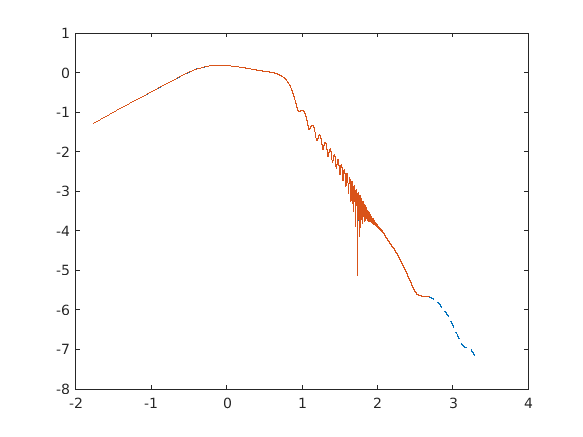

In [18]:
plot(log10(time_infield),log10(abs(Psi0)),'--')
hold on
plot(log10(time_infield_Hi),log10(abs(Psi0_Hi)))
hold off

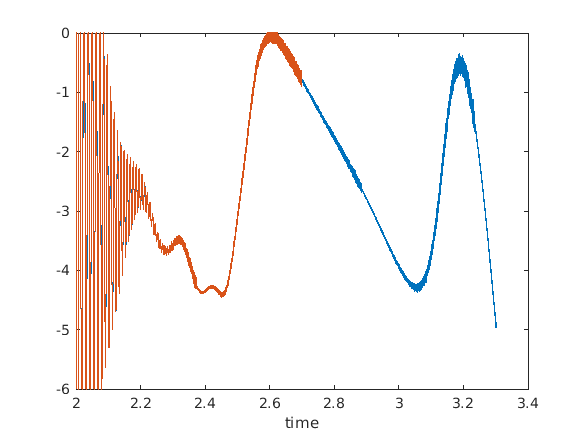

In [20]:
% plotting local power index of Psi0 and its higher resolution counterpart.

LPI_Psi0 = (log10(abs(Psi0(2:end))) - log10(abs(Psi0(1:end-1))))./(log10(time_infield(2:end)) - log10(time_infield(1:end-1)));
LPI_Psi0_Hi = (log10(abs(Psi0_Hi(2:end))) - log10(abs(Psi0_Hi(1:end-1))))./(log10(time_infield_Hi(2:end)) - log10(time_infield_Hi(1:end-1)));

plot(log10(time_infield(2:end)),LPI_Psi0)
hold on
plot(log10(time_infield_Hi(2:end)),LPI_Psi0_Hi)
xlim([2,3.4])
ylim([-6,0])
xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
hold off

In [ ]:
LPI_Psi4 = (log10(abs(Psi4(2:end))) - log10(abs(Psi4(1:end-1))))./(log10(time_infield(2:end)) - log10(time_infield(1:end-1)));
%hold on
plot(log10(time_infield(2:end)),LPI_Psi4)
xlim([2,3.4])
xlabel('time')
%plot(log10(time_infield),log10(abs(Psi4)))
%xlim([3,3.4])
%xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

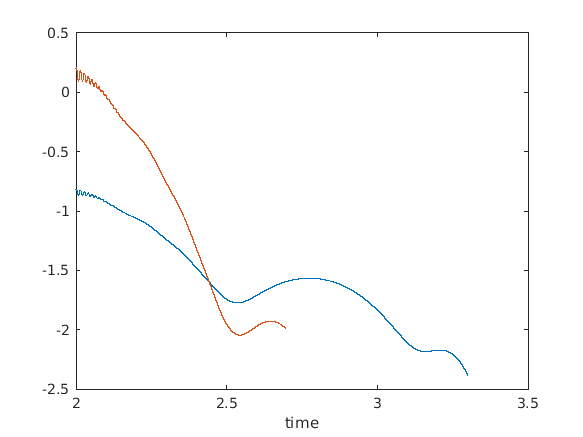

In [21]:
% beetle-burko scalar in lower and higher resolution.

plot(log10(time_infield),log10(abs(bbscalar_12)))
hold on
plot(log10(time_infield_Hi),log(abs(bbscalar_12_Hi)))
xlim([2,3.5])
xlabel('time')
%ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
hold off

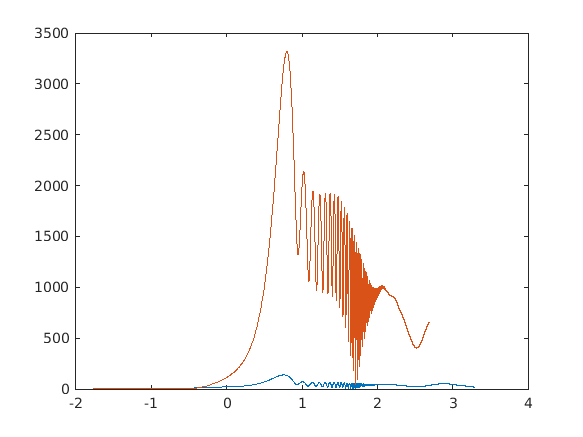

In [22]:
% gravitational hair in lower and higher resolution

plot(log10(time_infield(1:end)),hair_old)
hold on
plot(log10(time_infield_Hi(1:end)),hair_old_Hi)
hold off

The two plots above have to be checked again. --> I am using incorrect values of $\psi_0$. I need to multiply every other value of $\psi_0$ with $\psi_4$ to get bbscalar.

# Gaussian with center 1.3

In [ ]:
addpath('phd_work/projects/non-axisymmetric-hair/old_data/loc13')
infield_data = load('Psi0_TimeDAT_0.dat');
der_infield_data = load('Psi0_TimeDAT_1.dat');
outfield_data = load('Psi4_TimeDAT_0.dat');
der_outfield_data = load('Psi4_TimeDAT_1.dat');

time_infield = infield_data(1:51000,1);
real_infield = infield_data(1:51000,2);
imag_infield = infield_data(1:51000,3);
real_der_infield = der_infield_data(1:51000,2);
imag_der_infield = der_infield_data(1:51000,3);

time_outfield = outfield_data(1:51000,1);
real_outfield = outfield_data(1:51000,2);
imag_outfield = outfield_data(1:51000,3);
real_der_outfield = der_outfield_data(1:51000,2);
imag_der_outfield = der_outfield_data(1:51000,3);

rmpath('phd_work/projects/non-axisymmetric-hair/old_data/loc13')

In [ ]:
Psi0 = real_infield + 1i.*imag_infield;
Psi4 = real_outfield + 1i.*imag_outfield;
der_Psi0 = real_der_infield + 1i.*imag_der_infield;
der_Psi4 = real_der_outfield + 1i.*imag_der_outfield;
bbscalar_13 = Psi0.*Psi4;
hair_13 = abs(Psi0.*der_Psi4 + Psi4.*der_Psi0);
der_hair_13 = (hair_13(2:end) - hair_13(1:end-1))./(time_infield(2:end) - time_infield(1:end-1));

In [ ]:
%hold on
plot(time_infield,hair_13)
ylim([20,50])
xlabel('time')
ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

# Gaussian with center 1.4

In [ ]:
addpath('phd_work/projects/non-axisymmetric-hair/old_data/loc14')
infield_data = load('Psi0_TimeDAT_0.dat');
der_infield_data = load('Psi0_TimeDAT_1.dat');
outfield_data = load('Psi4_TimeDAT_0.dat');
der_outfield_data = load('Psi4_TimeDAT_1.dat');

time_infield = infield_data(1:51000,1);
real_infield = infield_data(1:51000,2);
imag_infield = infield_data(1:51000,3);
real_der_infield = der_infield_data(1:51000,2);
imag_der_infield = der_infield_data(1:51000,3);

time_outfield = outfield_data(1:51000,1);
real_outfield = outfield_data(1:51000,2);
imag_outfield = outfield_data(1:51000,3);
real_der_outfield = der_outfield_data(1:51000,2);
imag_der_outfield = der_outfield_data(1:51000,3);

rmpath('phd_work/projects/non-axisymmetric-hair/old_data/loc14')

In [ ]:
Psi0 = real_infield + 1i.*imag_infield;
Psi4 = real_outfield + 1i.*imag_outfield;
der_Psi0 = real_der_infield + 1i.*imag_der_infield;
der_Psi4 = real_der_outfield + 1i.*imag_der_outfield;
bbscalar_14 = Psi0.*Psi4;
hair_14 = abs(Psi0.*der_Psi4 + Psi4.*der_Psi0);
der_hair_14 = (hair_14(2:end) - hair_14(1:end-1))./(time_infield(2:end) - time_infield(1:end-1));

In [ ]:
%hold on
plot(time_infield,hair_14)
ylim([0,50])
xlabel('time')
ylabel('|\partial_{r}(\psi_{0}\psi_{4})|')
%hold off

In [ ]:
whos